In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import os
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score ,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
import sklearn.metrics as metrics


import statsmodels.api as sm

import patsy

%matplotlib inline

https://repo.anaconda.com/archive/Anaconda3-2020.11-Windows-x86_64.exe
installing anaconda 

In [2]:
#importing the data set
df = pd.read_csv("covid.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [4]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
df.head(6)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1


In [6]:
#dropping id because we dont need it 
df.drop('id', axis = 1, inplace = True)

<AxesSubplot:>

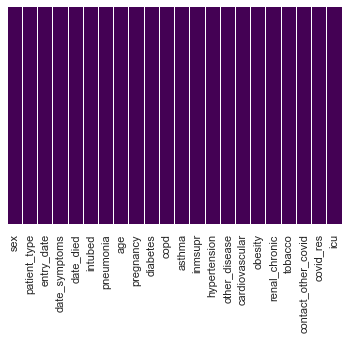

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
# dropping columns that we dont need or have alots of nan values 
del df['entry_date']
del df['date_symptoms']
del df['contact_other_covid']

In [9]:
# for surviveal analysis chaning date_died column to catagory 1 = dead , 2 = not dead)
df['date_died'] = df['date_died'].apply(lambda x : '2' if x == '9999-99-99' else  '1')

In [10]:
df.head(5)

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
0,2,1,2,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,2,97,2,24,97,2,2,2,2,2,2,2,2,2,2,1,97
2,1,2,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,1,2
3,2,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,1,2
4,1,2,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,1,2


In [11]:
#cleaning the column and replacing the bogus values with np.nan

col = [ 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res', 'icu']

for att in col:
    df[att] = df[att].apply(lambda x: np.nan if x == 98 or x == 97 or x == 99 else x)

<AxesSubplot:>

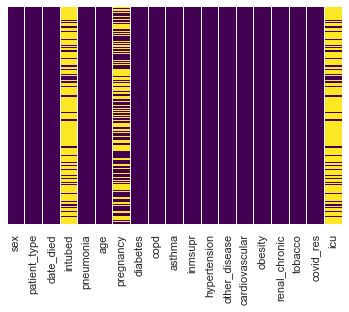

In [12]:
#to find out real number of null values in dataset
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
for i in df.columns:
    print(df[i].unique())        
# As we can see there are some imparactical values in age column so droping those
#second we have to make all the cloumns other then age as catgotrical 
# also replacing 1 to 0 and 2 to 1 for consistancy
#after that we will see how we can fill the Nan values in the dataset

[2 1]
[1 2]
['2' '1']
[nan  2.  1.]
[ 2.  1. nan]
[ 27  24  54  30  60  47  63  56  41  39  46  45  28  34  38  49  25  40
  61  31  33  52  83  43  77  37  32  53  42  57  48  59  44  65  73  71
  51  50  35  67  55  78  29  79  36  66  74  58  84  26  80   3  75  68
  87  69  89  76  62  18  23  70  17  72   0  81  64  88  20  15  22  14
  16  86  92  90  82   5   7  11  21  85  95  19   1   4  97  10  93   9
   8  12  13   6  91   2  98  96  94 100 119 101  99 103 114 106 120 105
 102 116 104 118 109 110 117 115 113 108 107 111]
[nan  2.  1.]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[ 2.  1. nan]
[1 2 3]
[nan  2.  1.]


In [14]:
# male cant be pregnant 
df.loc[df['sex']== 2 , 'pregnancy'] = 2
#Outpatient - 1
#hence its safe to assume that Outpatient arent intubed nither are in icu 
# for practicallity removing all values where age > 105
df.loc[df['patient_type']== 1 , 'intubed'] = 2
df.loc[df['patient_type']== 1 , 'icu'] = 2
df = df[df['age'] < 105]

In [15]:
# to find out remaing nan values in each coloumns 
for i in df.columns:
    print(df[i].value_counts(dropna = False),'\n')

2    287088
1    279478
Name: sex, dtype: int64 

1    444658
2    121908
Name: patient_type, dtype: int64 

2    530390
1     36176
Name: date_died, dtype: int64 

2.0    556477
1.0      9965
NaN       124
Name: intubed, dtype: int64 

2.0    478384
1.0     88171
NaN        11
Name: pneumonia, dtype: int64 

30     14604
31     13911
36     13890
38     13847
37     13836
       ...  
100       42
101       17
102       16
103        9
104        7
Name: age, Length: 105, dtype: int64 

2.0    560916
1.0      4063
NaN      1587
Name: pregnancy, dtype: int64 

2.0    493755
1.0     70830
NaN      1981
Name: diabetes, dtype: int64 

2.0    555688
1.0      9129
NaN      1749
Name: copd, dtype: int64 

2.0    546788
1.0     18026
NaN      1752
Name: asthma, dtype: int64 

2.0    555610
1.0      8976
NaN      1980
Name: inmsupr, dtype: int64 

2.0    472236
1.0     92507
NaN      1823
Name: hypertension, dtype: int64 

2.0    546886
1.0     17083
NaN      2597
Name: other_disease, dtype: i

<AxesSubplot:>

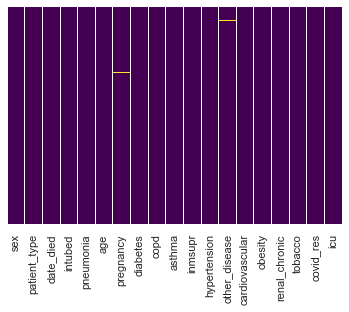

In [16]:
#dataset after cleaning and before dropping all nan values 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
# dropping all the nan values remaining 
df.dropna(inplace = True)

<AxesSubplot:>

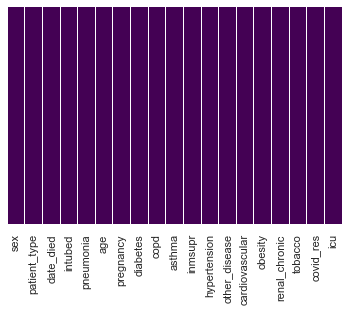

In [18]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [19]:
col = [ 'sex', 'patient_type','intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res', 'icu']
for c in col:
    df[c] = df[c].astype('int')
    df[c] = df[c].astype('str')

In [20]:
#Proper cleaned data set 
#for consistancy lets replace 1 to 1 , 2 = 0, 3 = 2

In [21]:
col = [ 'sex', 'patient_type','intubed', 'pneumonia', 
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res', 'icu', 'date_died']
for c in col:
    
    df[c] = df[c].replace('2', '0')
    df[c] = df[c].replace('3', '2')

In [22]:
df['patient_type'] = df['patient_type'].apply(lambda x : '0' if x == '1' else '1' )

In [23]:
#description of dataset chane every no = 0
"""
Female - 1, Male - 2
Outpatient - 0, Inpatient - 1
intubated Yes - 1, No - 0
penumonia Yes - 1, No - 0
prganacy = Yes - 1, No - 0
diabetes Yes - 1, No - 0
'copd' Yes - 1, No - 0
'asthma' Yes - 1, No - 0
inmsupr Yes - 1, No - 0
'hypertension' Yes - 1, No - 0
'other_disease' Yes - 1, No - 0
'cardiovascular' Yes - 1, No - 0
'obesity' Yes - 1, No - 0
'renal_chronic' Yes - 1, No - 0
'tobacco'  Yes - 1, No - 0
'covid_res' Yes - 1, No - 0 waiting - 3 
'icu' Yes - 1, No - 0
date_died Yes - 1, No - 0
"""

"\nFemale - 1, Male - 2\nOutpatient - 0, Inpatient - 1\nintubated Yes - 1, No - 0\npenumonia Yes - 1, No - 0\nprganacy = Yes - 1, No - 0\ndiabetes Yes - 1, No - 0\n'copd' Yes - 1, No - 0\n'asthma' Yes - 1, No - 0\ninmsupr Yes - 1, No - 0\n'hypertension' Yes - 1, No - 0\n'other_disease' Yes - 1, No - 0\n'cardiovascular' Yes - 1, No - 0\n'obesity' Yes - 1, No - 0\n'renal_chronic' Yes - 1, No - 0\n'tobacco'  Yes - 1, No - 0\n'covid_res' Yes - 1, No - 0 waiting - 3 \n'icu' Yes - 1, No - 0\ndate_died Yes - 1, No - 0\n"

In [24]:
#creating a dummy column because we have 3 values in 'covid_res' to apply some algoritham this is required 
covid_re = pd.get_dummies(df['covid_res'], prefix= 'covid_res' ,drop_first= True)

In [25]:
new = df[[ 'sex', 'patient_type','intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'icu', 'date_died']]

In [26]:
new_df = pd.concat([covid_re, new], axis=1)

In [27]:
Y = new_df['date_died']
X = new_df.iloc[:,:-1]

In [28]:
np.bincount(Y)

array([525559,  35503], dtype=int64)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# as we can see we have very imbalanced 
np.bincount(Y_train)

array([420452,  28397], dtype=int64)

# logistic regression model

In [31]:
# logistic regression model
lr = LogisticRegression( max_iter=1000)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(f'accuracy score for logistic model, {accuracy_score(Y_test, y_pred)}')
print(classification_report(Y_test, y_pred))

accuracy score for logistic model, 0.9419051268569595
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    105107
           1       0.58      0.29      0.39      7106

    accuracy                           0.94    112213
   macro avg       0.77      0.64      0.68    112213
weighted avg       0.93      0.94      0.93    112213



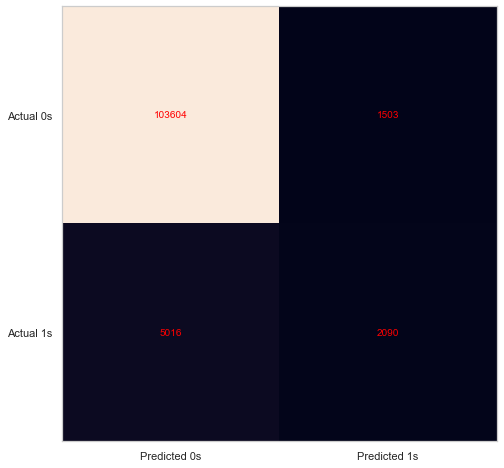

In [32]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

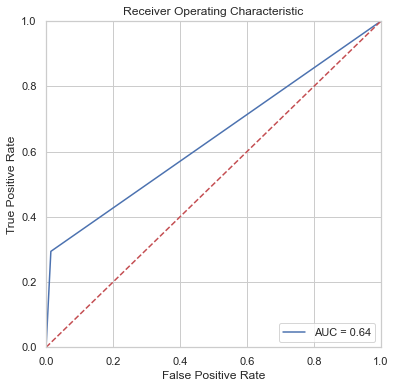

In [33]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')
fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# logistic regression with Weight 

In [34]:
Y_train  = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [35]:
#logistic regression with gridsearch 
w = {0:1, 1:99}
# define model
lg2 = LogisticRegression(class_weight=w,max_iter=1000 )
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'accuracy score for weighted logistic model, {accuracy_score(Y_test, y_pred)}')
print(classification_report(Y_test, y_pred))

accuracy score for weighted logistic model, 0.7682354094445385
              precision    recall  f1-score   support

           0       1.00      0.75      0.86    105107
           1       0.21      0.98      0.35      7106

    accuracy                           0.77    112213
   macro avg       0.60      0.87      0.60    112213
weighted avg       0.95      0.77      0.83    112213



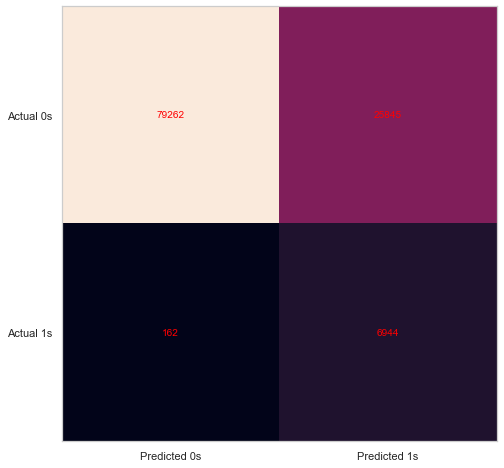

In [36]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

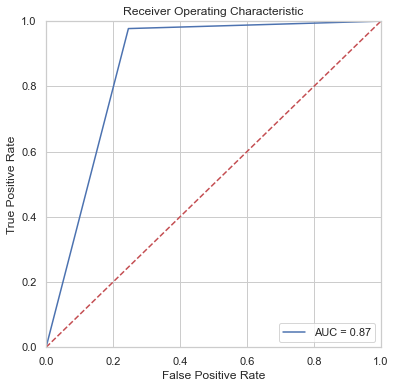

In [37]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')
fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
"""
w = [{0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

hyperparam_grid = {"class_weight": w }

"""

'\nw = [{0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, \n     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, \n     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, \n     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, \n     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, \n     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, \n     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]\n\nhyperparam_grid = {"class_weight": w }\n\n'

In [39]:
"""
Y = Y.astype(int)
# define model
lg3 = LogisticRegression(max_iter=1000)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=10, n_jobs=-1, refit=True)
grid.fit(X,Y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')
"""


'\nY = Y.astype(int)\n# define model\nlg3 = LogisticRegression(max_iter=1000)\n# define evaluation procedure\ngrid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=10, n_jobs=-1, refit=True)\ngrid.fit(X,Y)\nprint(f\'Best score: {grid.best_score_} with param: {grid.best_params_}\')\n'

# Naive bayes model 

In [40]:
from sklearn.naive_bayes import GaussianNB

model_GBN = GaussianNB()
model_GBN.fit(X_train,Y_train)

y_pred = model_GBN.predict(X_test).tolist()

accuracy = accuracy_score(Y_test, y_pred)
print("NAVIE BAYES accuracy=",accuracy)

scores = cross_val_score(model_GBN, X, Y, cv=5)
print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, y_pred))

NAVIE BAYES accuracy= 0.8846122998226587
Cross validation Accuracy: 0.88 (+/- 0.06)
              precision    recall  f1-score   support

           0       0.97      0.90      0.94    105107
           1       0.30      0.63      0.41      7106

    accuracy                           0.88    112213
   macro avg       0.64      0.76      0.67    112213
weighted avg       0.93      0.88      0.90    112213



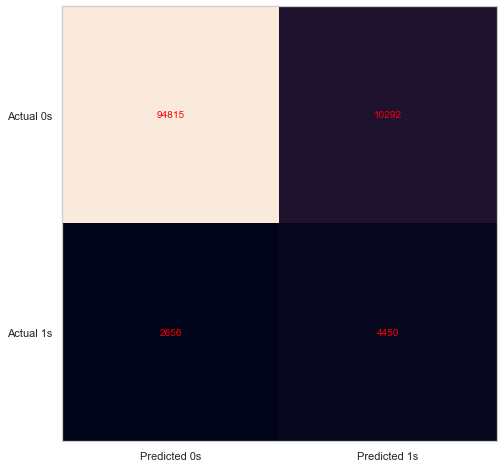

In [41]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

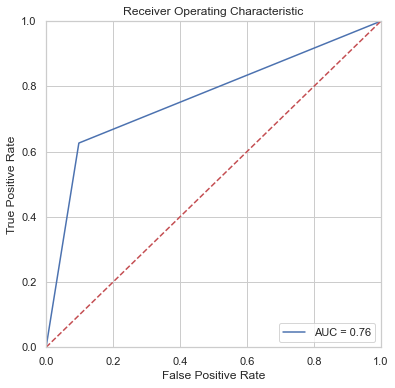

In [42]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')


fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test).tolist()

accuracy = accuracy_score(Y_test, y_pred)
print(f"random forest validation set approach Accuracy = {accuracy}" )

scores = cross_val_score(classifier, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(classification_report(Y_test, y_pred))

random forest validation set approach Accuracy = 0.935417464999599
Accuracy: 0.93 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    105107
           1       0.48      0.29      0.37      7106

    accuracy                           0.94    112213
   macro avg       0.72      0.64      0.67    112213
weighted avg       0.92      0.94      0.93    112213



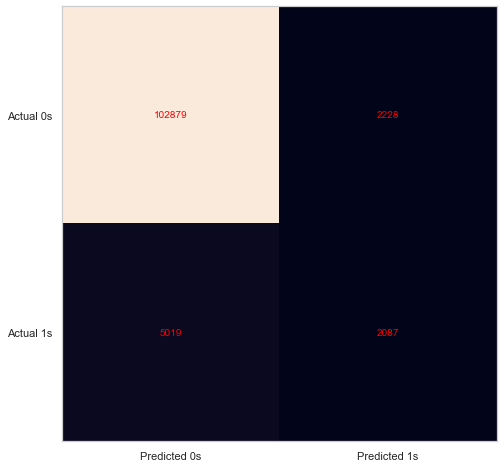

In [44]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

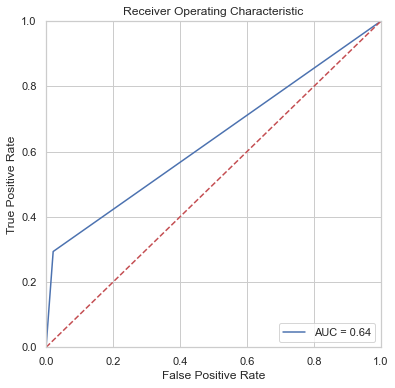

In [45]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')

fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Applying Smote 

In [46]:
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)

In [47]:
np.bincount(Y_train)

array([420452, 420452], dtype=int64)

# Applying the logistic regression with smote 

In [48]:
#applying the logistic regression with smote 
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(X_train, Y_train)
y_pred = lr3.predict(X_test)
print(f'accuracy score for logistic model with smote {accuracy_score(Y_test, y_pred)}')
print(classification_report(Y_test, y_pred))

accuracy score for logistic model with smote 0.8671989876395783
              precision    recall  f1-score   support

           0       0.99      0.87      0.92    105107
           1       0.31      0.89      0.46      7106

    accuracy                           0.87    112213
   macro avg       0.65      0.88      0.69    112213
weighted avg       0.95      0.87      0.89    112213



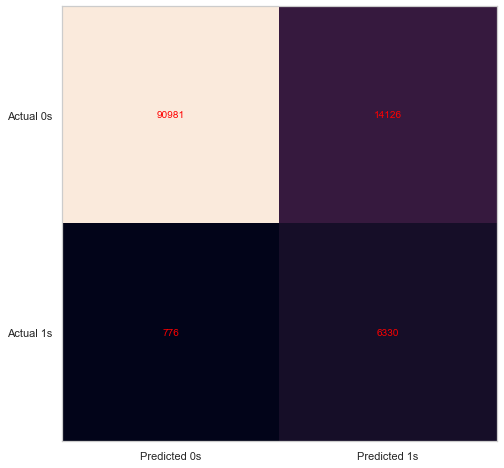

In [49]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha= 'center', va = 'center', color = 'red' )
plt.show()

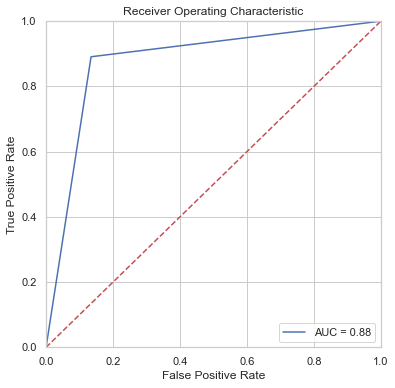

In [50]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')

fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
lr3.coef_

array([[ 0.86377604, -0.69049479, -0.55002455,  2.81368976,  1.54036174,
         1.20194886,  0.04551499, -0.83012227,  0.29973859, -0.17920754,
        -0.61107195,  0.2549658 ,  0.16611718,  0.40439797, -0.33786509,
         0.15942054,  0.47946197, -0.45499355, -0.51251723]])

In [74]:
X_train.columns

Index(['covid_res_1', 'covid_res_2', 'sex', 'patient_type', 'intubed',
       'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'icu'],
      dtype='object')

In [117]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr3.coef_.transpose())

table = coef_table.sort_values(by = ['Coefs'], ascending=False)[:8]
table[0].values


array(['patient_type', 'intubed', 'pneumonia', 'covid_res_1',
       'renal_chronic', 'other_disease', 'diabetes', 'inmsupr'],
      dtype=object)

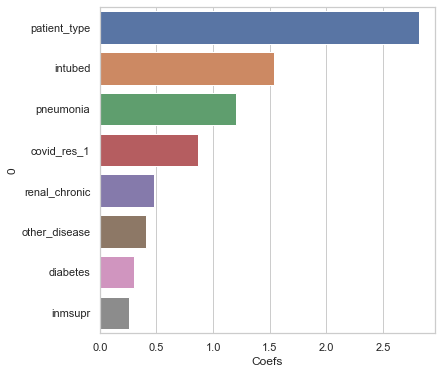

In [114]:
fig, ax = plt.subplots(figsize= (6,6))

ax = sns.barplot(x='Coefs', y= 0 , data= table)

# logistic regression with statmodel + Smote

In [51]:
y = np.asarray(Y_train, dtype=float)
log_reg = sm.Logit(y,X_train.astype('int')).fit()
print(log_reg.summary())
yhat = log_reg.predict(np.asarray(X_test, dtype=float))
yhat = [1 if i > .5 else 0 for i in yhat ]
print(classification_report(Y_test, yhat))

Optimization terminated successfully.
         Current function value: 0.395088
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               840904
Model:                          Logit   Df Residuals:                   840885
Method:                           MLE   Df Model:                           18
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.4300
Time:                        21:19:11   Log-Likelihood:            -3.3223e+05
converged:                       True   LL-Null:                   -5.8287e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
covid_res_1        0.0593      0.007      8.796      0.000       0.046       0.072
covid_res_2      

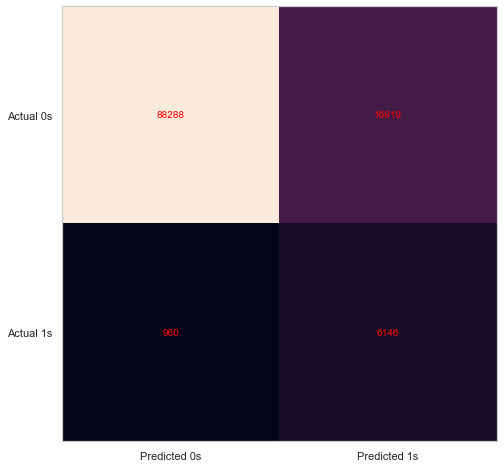

In [52]:
cm = confusion_matrix(Y_test, yhat)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

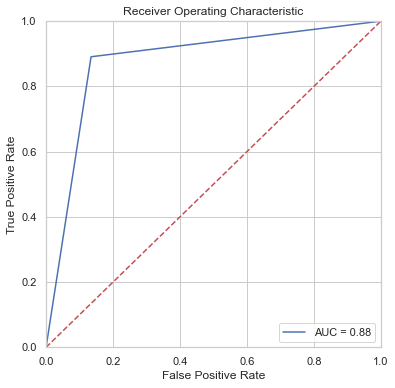

In [53]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')
fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive bayes with smote 

In [54]:
model_GBN = GaussianNB()
model_GBN.fit(X_train,Y_train)

y_pred = model_GBN.predict(X_test).tolist()

accuracy = accuracy_score(Y_test, y_pred)

print("NAVIE BAYES accuracy with Smote =",accuracy)
print(classification_report(Y_test, y_pred))

NAVIE BAYES accuracy with Smote = 0.8631174641084366
              precision    recall  f1-score   support

           0       0.99      0.87      0.92    105107
           1       0.29      0.82      0.43      7106

    accuracy                           0.86    112213
   macro avg       0.64      0.84      0.68    112213
weighted avg       0.94      0.86      0.89    112213



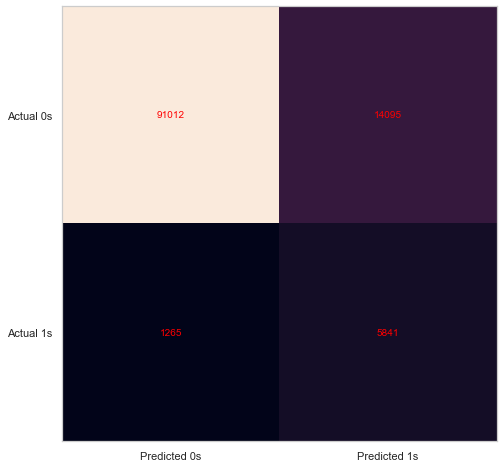

In [55]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha= 'center', va = 'center', color = 'red' )
plt.show()

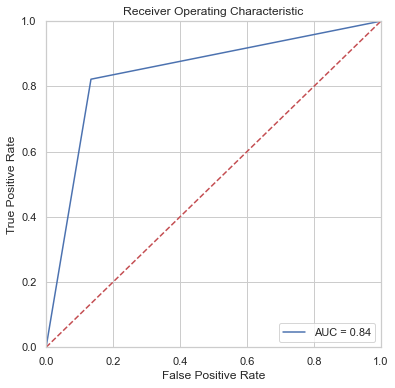

In [56]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')
fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random forest with Smote


In [57]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test).tolist()

accuracy = accuracy_score(Y_test, y_pred)

print(f"random forest validation set approach Accuracy = {accuracy}" )
print(classification_report(Y_test, y_pred))

random forest validation set approach Accuracy = 0.8963578195039791
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    105107
           1       0.34      0.65      0.44      7106

    accuracy                           0.90    112213
   macro avg       0.66      0.78      0.69    112213
weighted avg       0.93      0.90      0.91    112213



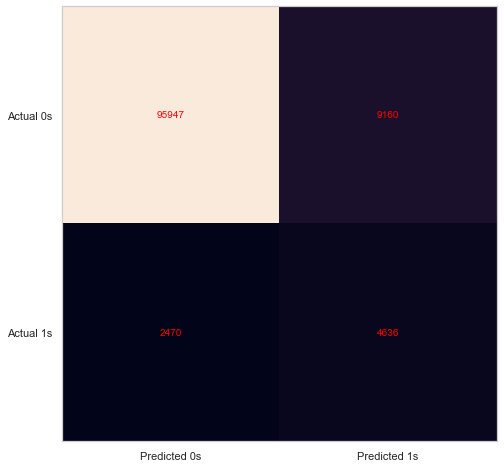

In [58]:
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha= 'center', va = 'center', color = 'red' )
plt.show()

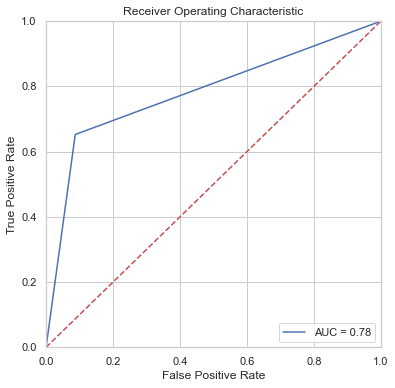

In [59]:
Y_t = Y_test.astype('int32').tolist()
y_p = np.array(y_pred).astype('int32')
fig, ax = plt.subplots(figsize= (6,6))
fpr, tpr, threshold = metrics.roc_curve(Y_t, y_p)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# performing Eda

<AxesSubplot:xlabel='sex', ylabel='count'>

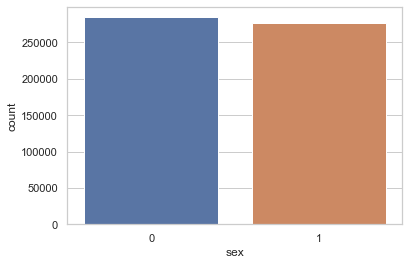

In [60]:
sns.countplot(data = df, x = 'sex')

<AxesSubplot:xlabel='age', ylabel='Count'>

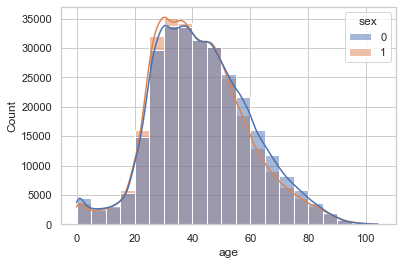

In [61]:
sns.histplot(data = df, x = 'age',binwidth= 5, hue ='sex', kde=True)

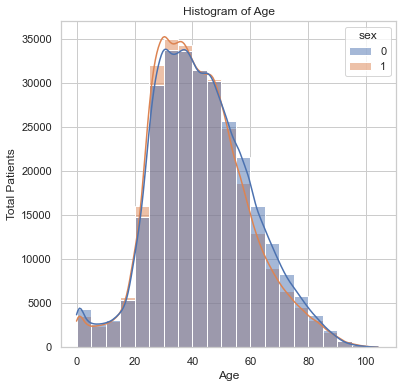

In [62]:

fig, ax = plt.subplots(figsize= (6,6))

sns.histplot(data = df, x = 'age',binwidth= 5, hue ='sex', kde=True ,ax =ax )
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Total Patients')
plt.show()

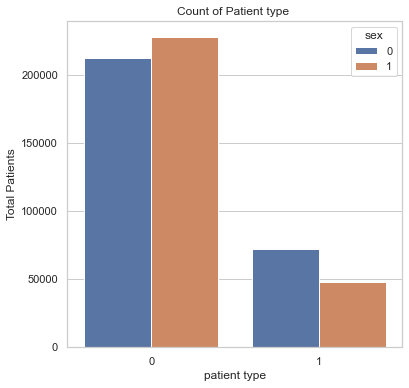

In [63]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'patient_type', hue ='sex',ax =ax )
plt.title('Count of Patient type ')
plt.xlabel('patient type')
plt.ylabel('Total Patients')
plt.show()

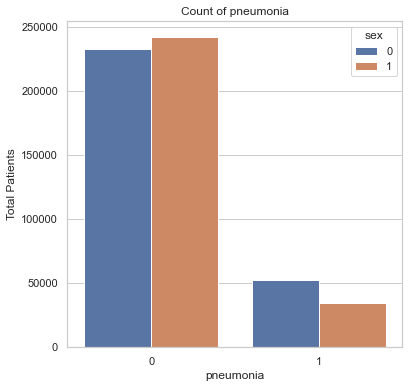

In [64]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'pneumonia', hue ='sex',ax =ax )
plt.title('Count of pneumonia')
plt.xlabel('pneumonia')
plt.ylabel('Total Patients')
plt.show()

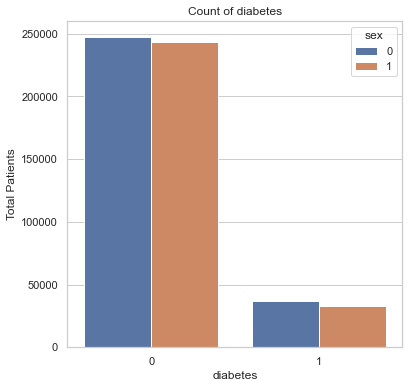

In [65]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'diabetes', hue ='sex',ax =ax )
plt.title('Count of diabetes')
plt.xlabel('diabetes')
plt.ylabel('Total Patients')
plt.show()

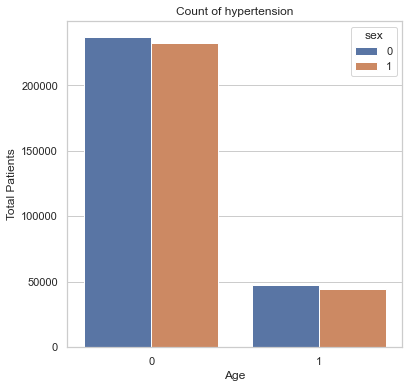

In [66]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'hypertension', hue ='sex',ax =ax )
plt.title('Count of hypertension')
plt.xlabel('Age')
plt.ylabel('Total Patients')
plt.show()

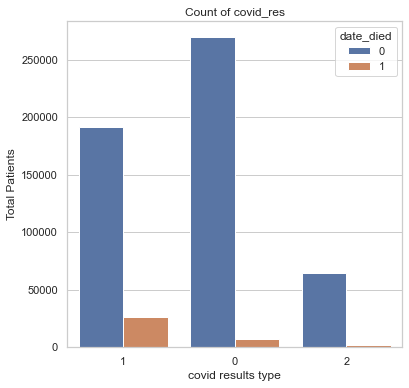

In [67]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'covid_res', hue ='date_died',ax =ax )
plt.title('Count of covid_res')
plt.xlabel('covid results type')
plt.ylabel('Total Patients')
plt.show()

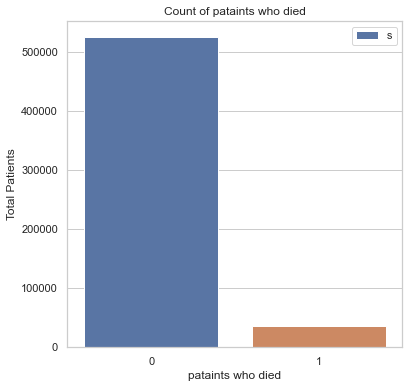

In [68]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'date_died',ax =ax )
plt.title('Count of pataints who died')
plt.xlabel('pataints who died')
plt.ylabel('Total Patients')
ax.legend('survived' 'Died')
plt.show()

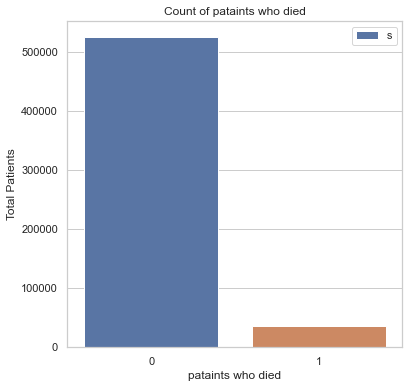

In [69]:
fig, ax = plt.subplots(figsize= (6,6))

sns.countplot(data = df, x = 'date_died',ax =ax )
plt.title('Count of pataints who died')
plt.xlabel('pataints who died')
plt.ylabel('Total Patients')
ax.legend('survived' 'Died')
plt.show()